<h1>Project : United Kingdom Road Accident Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1>Import Libraries</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Dataframe</h1>

In [4]:
aksident = pd.read_csv('dataset\\accident_data.csv')

In [5]:
aksident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [6]:
aksident_total = aksident['Index'].count()

In [7]:
aksident_total

np.int64(660679)

In [8]:
aksident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [9]:
aksident['Accident_Severity'] = aksident['Accident_Severity'].astype('category')

<h1>Converting Object into DateTime Data Type</h1>

In [10]:
aksident['Accident Date'] = pd.to_datetime(aksident['Accident Date'], dayfirst = True, errors = 'coerce')

In [11]:
aksident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [12]:
aksident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Filling up missing value</h1>

In [13]:
aksident['Latitude'] = aksident['Latitude'].fillna(aksident['Latitude'].mode()[0])
aksident['Longitude'] = aksident ['Longitude'].fillna(aksident['Longitude'].mode()[0])
aksident['Road_Surface_Conditions'] = aksident['Road_Surface_Conditions'].fillna('unknown Road Surface Conditions')
aksident['Road_Type'] = aksident['Road_Type'].fillna('unknown Road Type')
aksident['Urban_or_Rural_Area'] = aksident['Urban_or_Rural_Area'].fillna('unknown Urban or Rural Area')
aksident['Weather_Conditions'] = aksident['Weather_Conditions'].fillna('unknown Weather Conditions')

In [14]:
aksident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [15]:
aksident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [16]:
aksident['Latitude'] = aksident['Latitude'].astype('category')
aksident['Light_Conditions'] = aksident['Light_Conditions'].astype('category')
aksident['District Area'] = aksident['District Area'].astype('category')
aksident['Longitude'] = aksident['Longitude'].astype('category')
aksident['Road_Surface_Conditions'] = aksident['Road_Surface_Conditions'].astype('category')
aksident['Road_Type'] = aksident['Road_Type'].astype('category')
aksident['Urban_or_Rural_Area'] = aksident['Urban_or_Rural_Area'].astype('category')
aksident['Weather_Conditions'] = aksident['Weather_Conditions'].astype('category')
aksident['Vehicle_Type'] = aksident['Vehicle_Type'].astype('category')
aksident['Road_Type'] = aksident['Road_Type'].astype('category')

In [17]:
aksident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [18]:
aksident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting date info</h1>

In [19]:
aksident['Year'] = aksident['Accident Date'].dt.year
aksident['Month'] = aksident['Accident Date'].dt.month
aksident['Day'] = aksident['Accident Date'].dt.day
aksident['DayOfWeek'] = aksident['Accident Date'].dt.dayofweek

<h1>UniVariate</h1>

In [20]:
df_2019 = aksident[aksident['Year'] == 2019 ]

In [21]:
df_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown Road Type,Urban,unknown Weather Conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown Road Type,Urban,unknown Weather Conditions,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,23,0


In [22]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

In [23]:
df_2019['Light_Conditions'].value_counts().sum()

np.int64(182115)

<h1>Using Percentage Difference Calculator</h1>
<h3>Answer : There is a = 31.1419% difference</h3>

<h1>BiVariate</h1>

In [24]:
fine = aksident[aksident['Weather_Conditions'] == 'Fine no high winds']
fine['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      392668
Van / Goods 3.5 tonnes mgw or under       26877
Bus or coach (17 or more pass seats)      20398
Motorcycle over 500cc                     20245
Goods 7.5 tonnes mgw and over             13589
Motorcycle 125cc and under                12064
Taxi/Private hire car                     10452
Motorcycle over 125cc and up to 500cc      6069
Motorcycle 50cc and under                  6017
Goods over 3.5t. and under 7.5t            4823
Other vehicle                              4450
Minibus (8 - 16 passenger seats)           1552
Agricultural vehicle                       1513
Pedal cycle                                 161
Data missing or out of range                  4
Ridden horse                                  3
Name: count, dtype: int64

<h1>Total of Accident because of "TGIF" Motto</h1>

<h1>MultiVariate</h1>

In [25]:
Severity = aksident.groupby("Accident_Severity").count()

In [26]:
Severity

,Index,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
Accident_Severity,,,,,,,,,,,,,,,,,
Fatal,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661,8661
Serious,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217,88217
Slight,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801,563801


<h1>Insight 1 : Total of accident happening every friday, because of the possible 'tgif' moto of every worker or students.</h1>

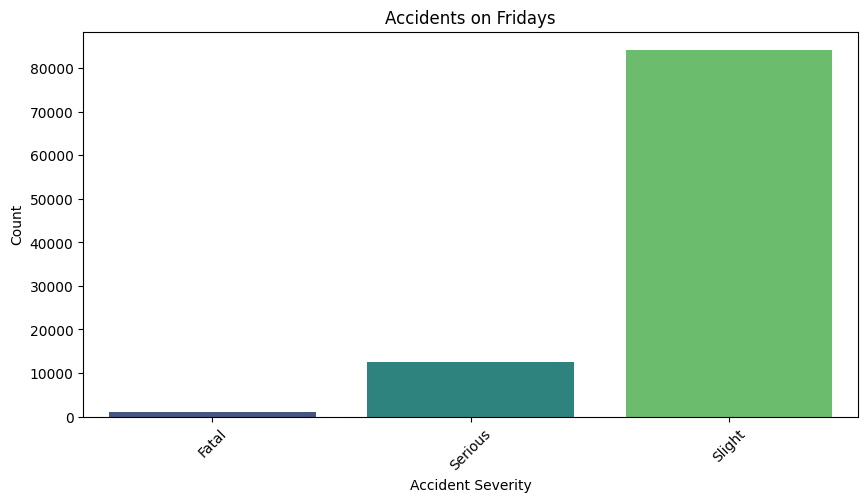

In [27]:
friday = aksident[aksident['DayOfWeek'] == 4]


friday_counts = friday['Accident_Severity'].value_counts()


plt.figure(figsize=(10, 5))
sns.barplot(x=friday_counts.index, y=friday_counts.values, palette="viridis")


plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Accidents on Fridays")
plt.xticks(rotation=45)

plt.show()

<h4>There is a total number of 97900 accident that happens every friday because of the possible 'tgif motto</h4>

<h1>Insight 2 : Correlation between Number of Casualties & Number of vehicles</h1>
<h3>is it possible that the higher vehicle number involve in a situaion is that there is a higher number of casualties?</h3>

In [56]:
corr = aksident['Number_of_Casualties'].corr(aksident['Number_of_Vehicles'])

In [57]:
corr

np.float64(0.2288888612692756)

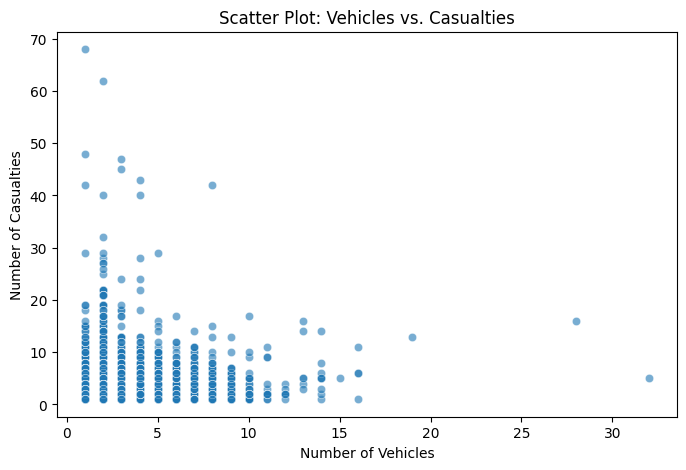

In [58]:

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=aksident, x="Number_of_Vehicles", y="Number_of_Casualties", alpha=0.6)


# Labels and title
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.title("Scatter Plot: Vehicles vs. Casualties")

plt.show()


<h1>There is no Correlation between Number of Casualties & Number of vehicles</h1>

<h1>Inisight 3 : Place that accident most happens</h1>
<h3>Rural or Urban?</h3>

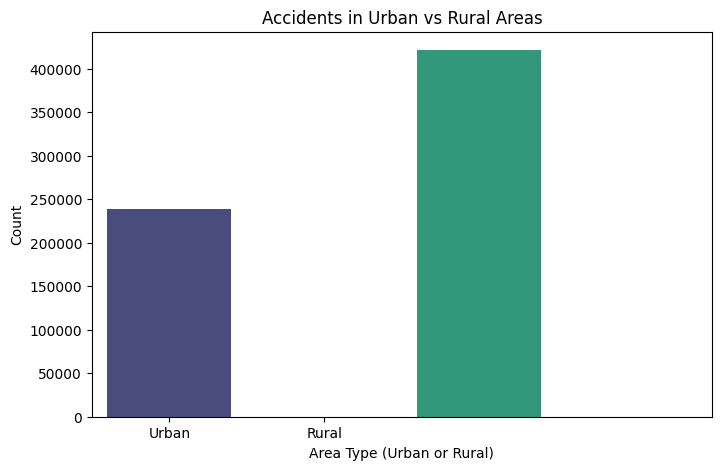

In [59]:
ruban_counts = aksident['Urban_or_Rural_Area'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=ruban_counts.index, y=ruban_counts.values, palette="viridis")

plt.xlabel("Area Type (Urban or Rural)")
plt.ylabel("Count")
plt.title("Accidents in Urban vs Rural Areas")

plt.xticks(ticks=[0, 1], labels=["Urban", "Rural"]) 
plt.show()

<h1>Insight 4 : Total number of accidents in 2022</h1>

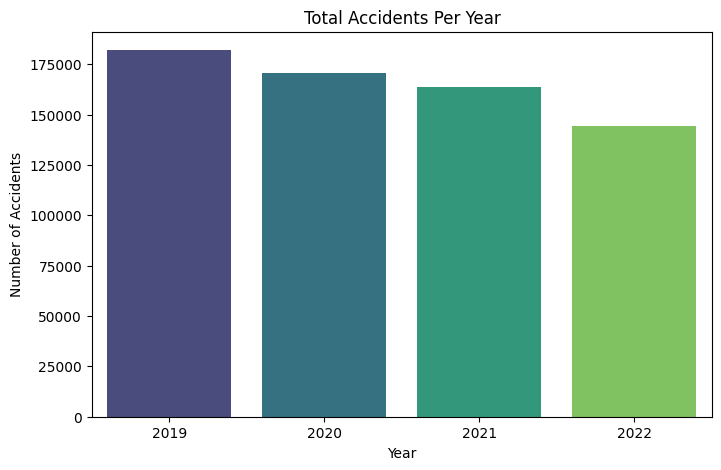

In [61]:
yearly_accidents = aksident['Accident Date'].dt.year.value_counts().sort_index()


plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_accidents.index, y=yearly_accidents.values, palette="viridis")


plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Total Accidents Per Year")

plt.show()

<h1>Insight 5 : Average number of accidents per day</h1>

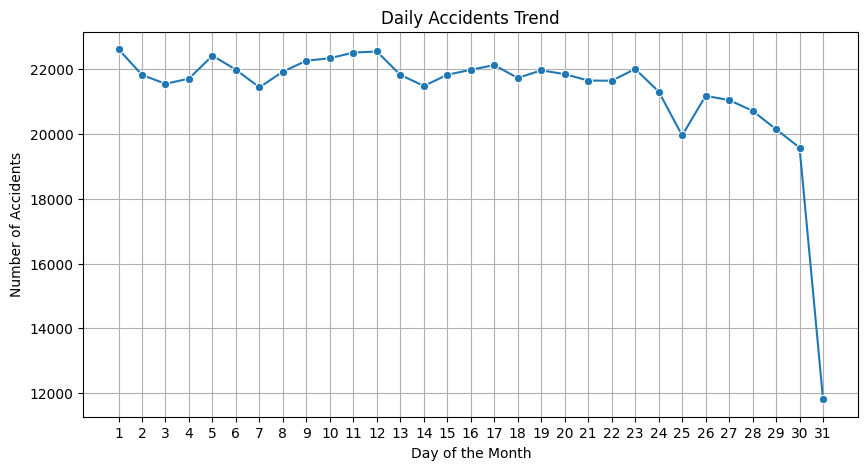

In [63]:
daily_accidents = aksident['Accident Date'].groupby(aksident['Accident Date'].dt.day).count()

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_accidents.index, y=daily_accidents.values, marker="o")

plt.xlabel("Day of the Month")
plt.ylabel("Number of Accidents")
plt.title("Daily Accidents Trend")

plt.xticks(range(1, 32))  # Ensure all days are visible
plt.grid()

plt.show()


<h1>Insight 6 : Types of severity that most happen in all accidents</h1>

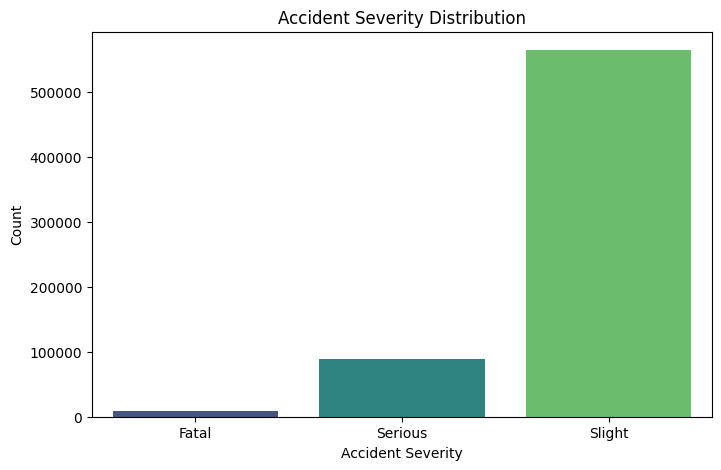

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Types.index, y=Types.values, palette="viridis")

plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Accident Severity Distribution")

plt.show()

<h1>Insight 7 : Most common light condition during accidents</h1>

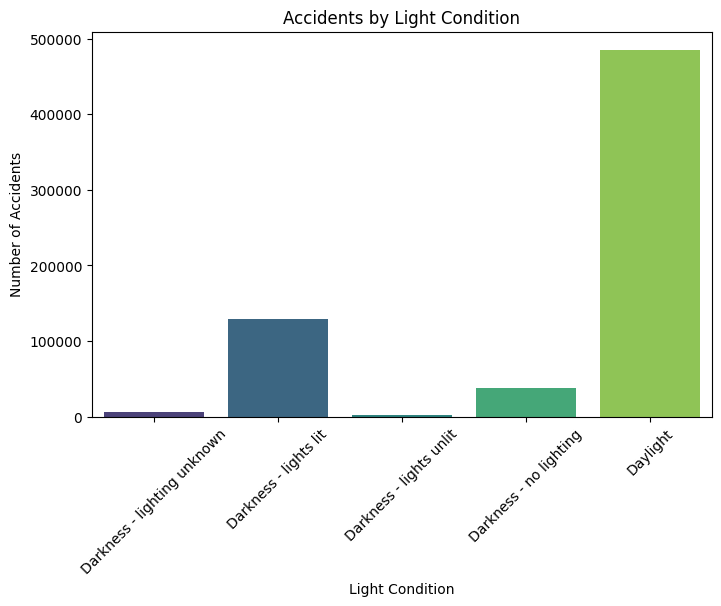

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(x=common_light_condition.index, y=common_light_condition.values, palette="viridis")

plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Light Condition")
plt.xticks(rotation=45)  # Rotate labels because it is too long

plt.show()

<h3>The mpst common condition that accident happen is in Daylight</h3>

<h1>Insight 8 : Most weather condition that accident happens</h1>

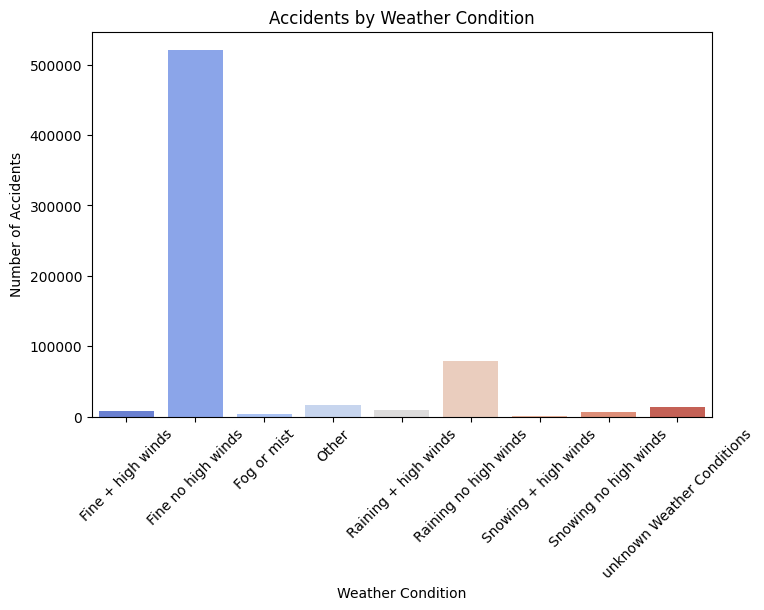

In [69]:
plt.figure(figsize=(8, 5))
sns.barplot(x=most_weather.index, y=most_weather.values, palette="coolwarm")

plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)

plt.show()

<h4>'Fine no winds' is the weather condition that accident most happens</h4>

<h1>Insight 9 : Average number of vehicles involved in Light Conditions</h1>

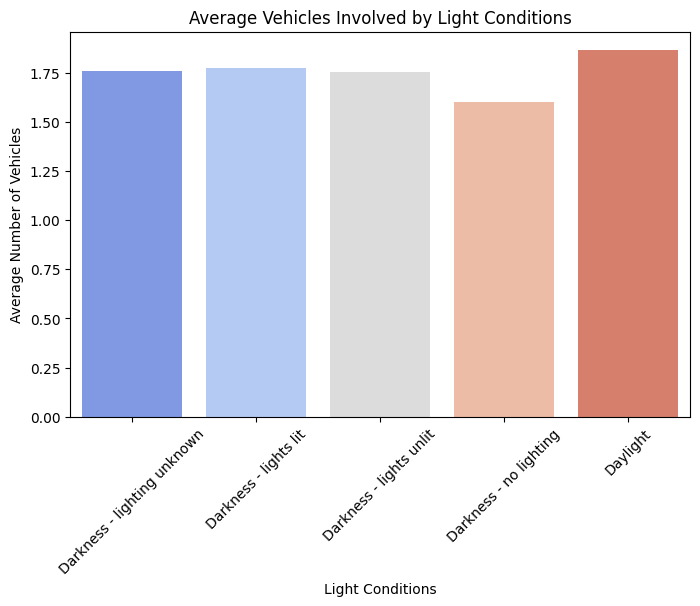

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average number of vehicles for each light condition
avg_vehicles_by_light = aksident.groupby("Light_Conditions")["Number_of_Vehicles"].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_vehicles_by_light.index, y=avg_vehicles_by_light.values, palette="coolwarm")

# Labels and title
plt.xlabel("Light Conditions")
plt.ylabel("Average Number of Vehicles")
plt.title("Average Vehicles Involved by Light Conditions")
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


<h4>There's a 1.83 average number of vehicle that is invilve in each accident</h4>

<h1>Insight 10 :  Most common road surface condition where accidents occurred</h1>

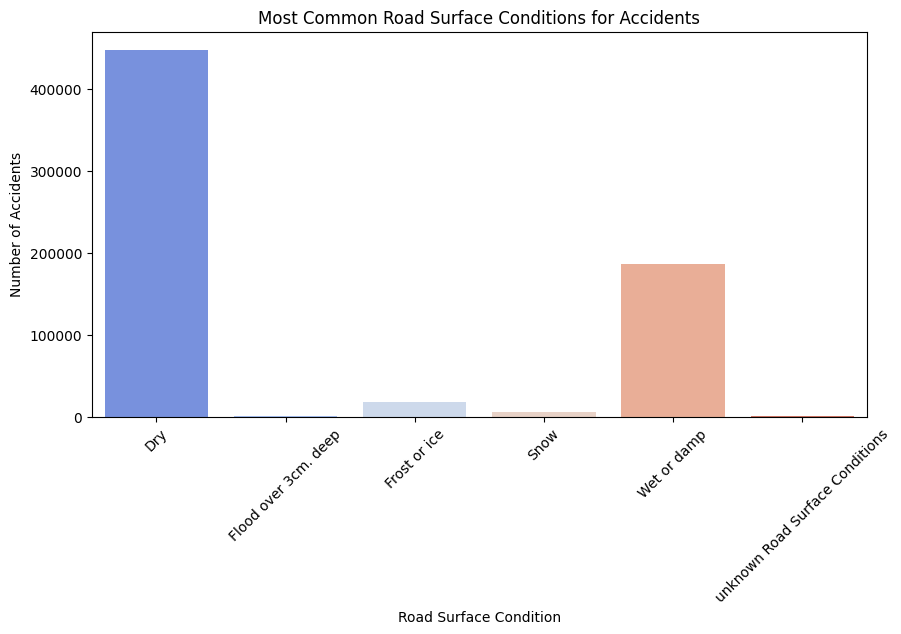

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(x=common_surface.index, y=common_surface.values, palette="coolwarm")

plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.title("Most Common Road Surface Conditions for Accidents")
plt.xticks(rotation=45) 

plt.show()


<h4>Dry road surface is the most road condition that accident mnost happens</h4>

<h1>Insight 11 : Day of the week that has the  highest number of accidents</h1>

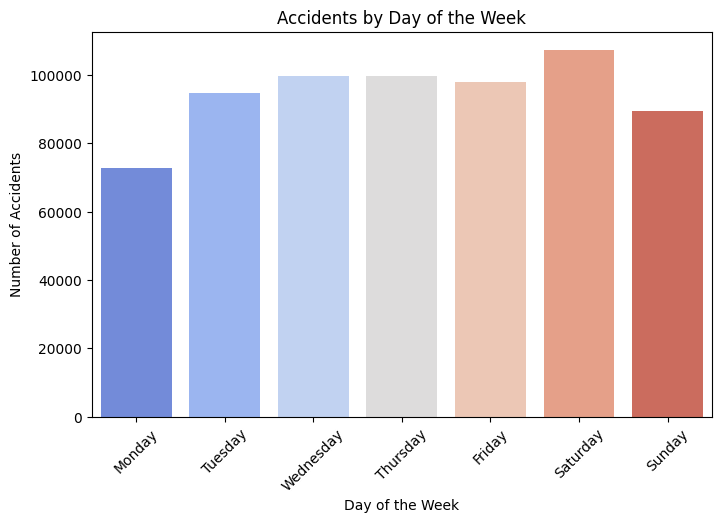

In [80]:
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_aksident = day_aksident.reindex([0, 1, 2, 3, 4, 5, 6])

plt.figure(figsize=(8, 5))
sns.barplot(x=day_labels, y=day_aksident.values, palette="coolwarm")

plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week")
plt.xticks(rotation=45)

plt.show()

<h4>Friday (Day 5) recorded the highest number of accidents, with 107,178 incidents.</h4>

<h1>Insight 12 : road type experienced the most accidents happens</h1>

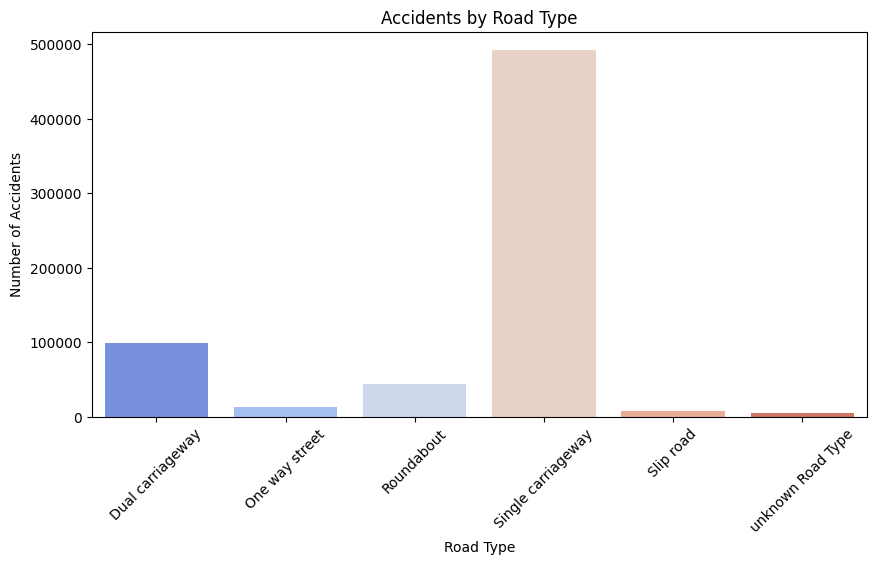

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(x=road_type.index, y=road_type.values, palette="coolwarm")

plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Road Type")
plt.xticks(rotation=45)  

plt.show()

<h4>The most accidents occurred on Single Carriageway roads, with 492,143 recorded incidents. </h4>

<h1>Insight 13 : Do weather condition affect the number of accidents</h1>

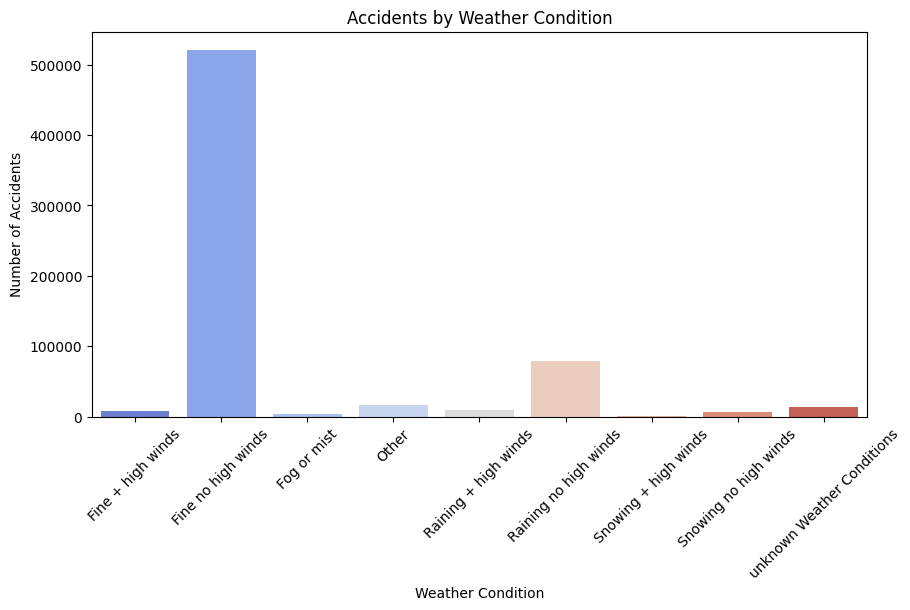

In [84]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_aksident.index, y=weather_aksident.values, palette="coolwarm")


plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)  

plt.show()

<h1>Insight 14 : Average Number of casualties on different road surface conditions</h1>

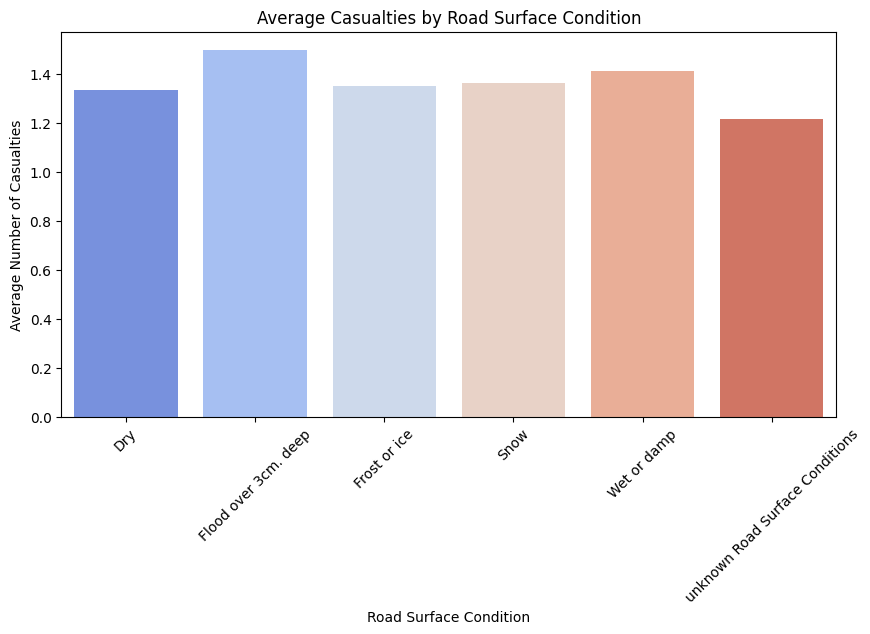

In [85]:
plt.figure(figsize=(10, 5))
sns.barplot(x=average_casualties.index, y=average_casualties.values, palette="coolwarm")

plt.xlabel("Road Surface Condition")
plt.ylabel("Average Number of Casualties")
plt.title("Average Casualties by Road Surface Condition")
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 15 : Number of Accident that involve Bus vehicle</h1>

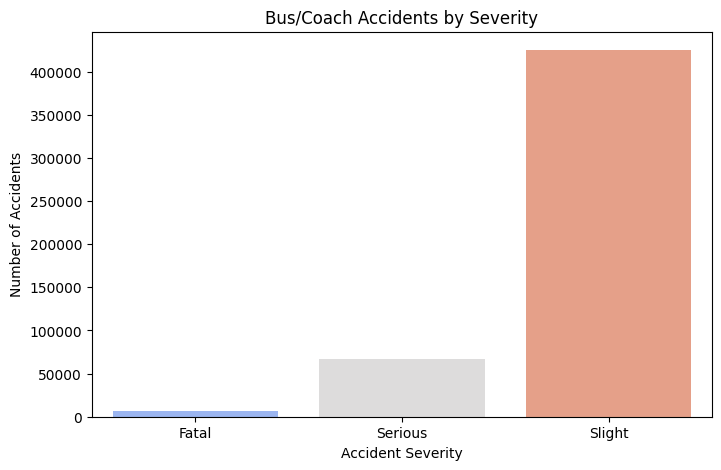

In [86]:
bus_accidents_severity = horse_aksident.groupby("Accident_Severity").size()

plt.figure(figsize=(8, 5))
sns.barplot(x=bus_accidents_severity.index, y=bus_accidents_severity.values, palette="coolwarm")

plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Bus/Coach Accidents by Severity")

plt.show()

<h4>'Slight' accident severity is most condition in an accident which involve bus vehicle</h4>

<h1>Insight 16 : Do weather conditions relate to light conditions in road accidents</h1>

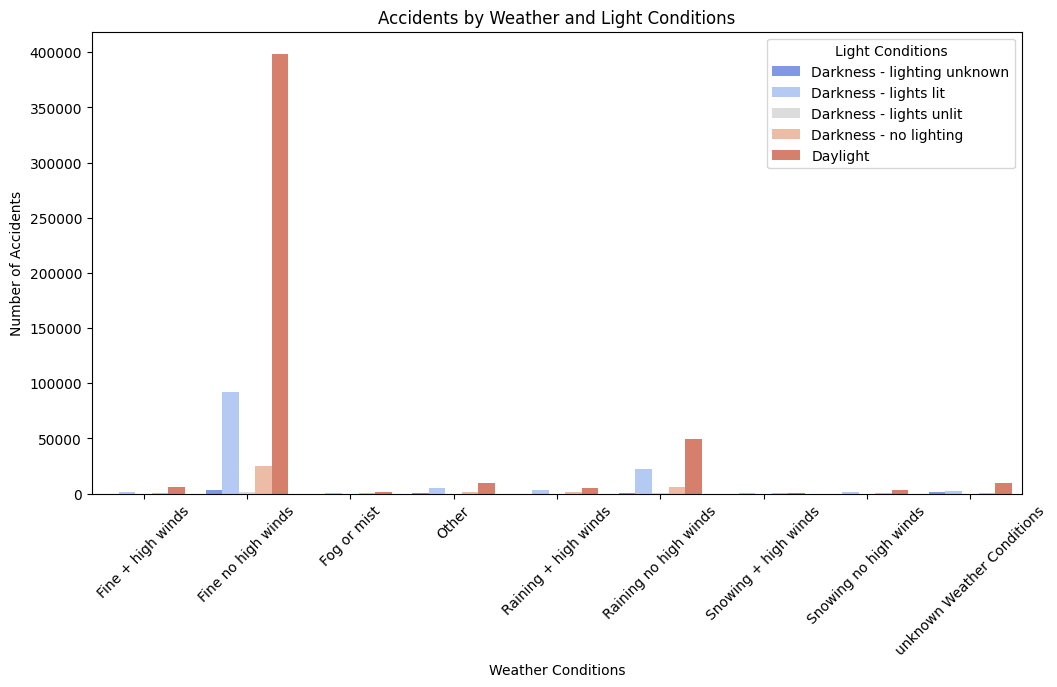

In [87]:
weather_condition_df = weather_condition.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Weather_Conditions", y="Accident Date", hue="Light_Conditions", data=weather_condition_df, palette="coolwarm")

plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather and Light Conditions")
plt.xticks(rotation=45) 
plt.legend(title="Light Conditions")

plt.show()

<h4>Most accidents occur in clear weather during daylight, but foggy and rainy conditions increase accidents in low-light conditions. </h4>

<h1>Insight 17 : To know weather conditions, road surface conditions, and accident severity have interaction</h1>

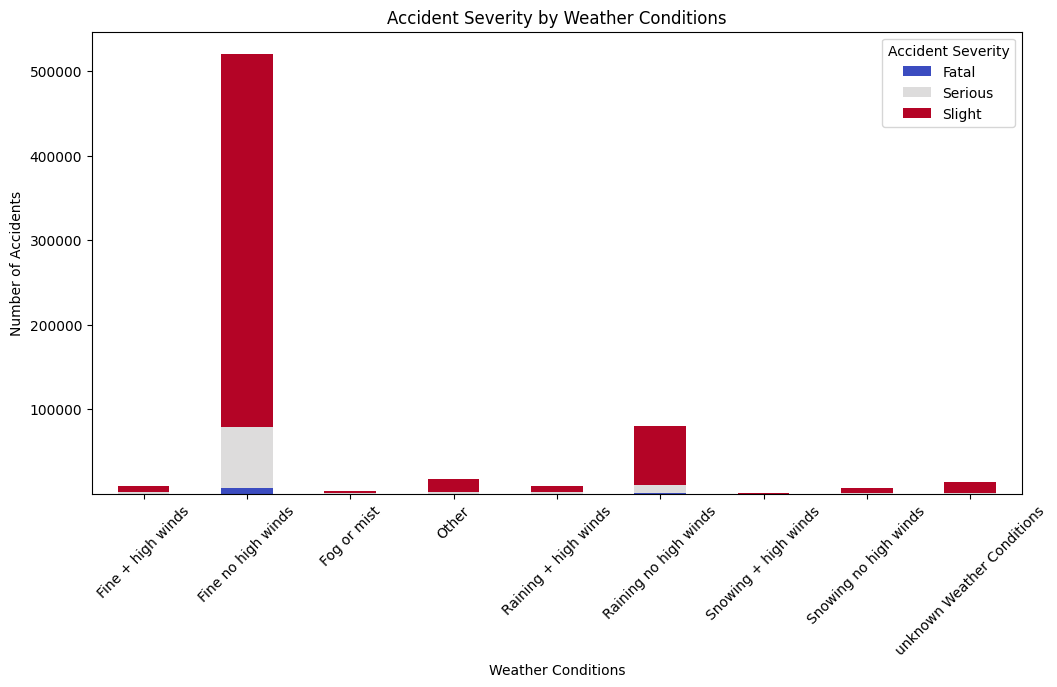

In [91]:
road_severity_df = road_severity.unstack()

road_severity_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Weather Conditions")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45) 

plt.show()

<h1>Insight 18 : To know road type, light conditions, and accident severity relate to each other</h1>

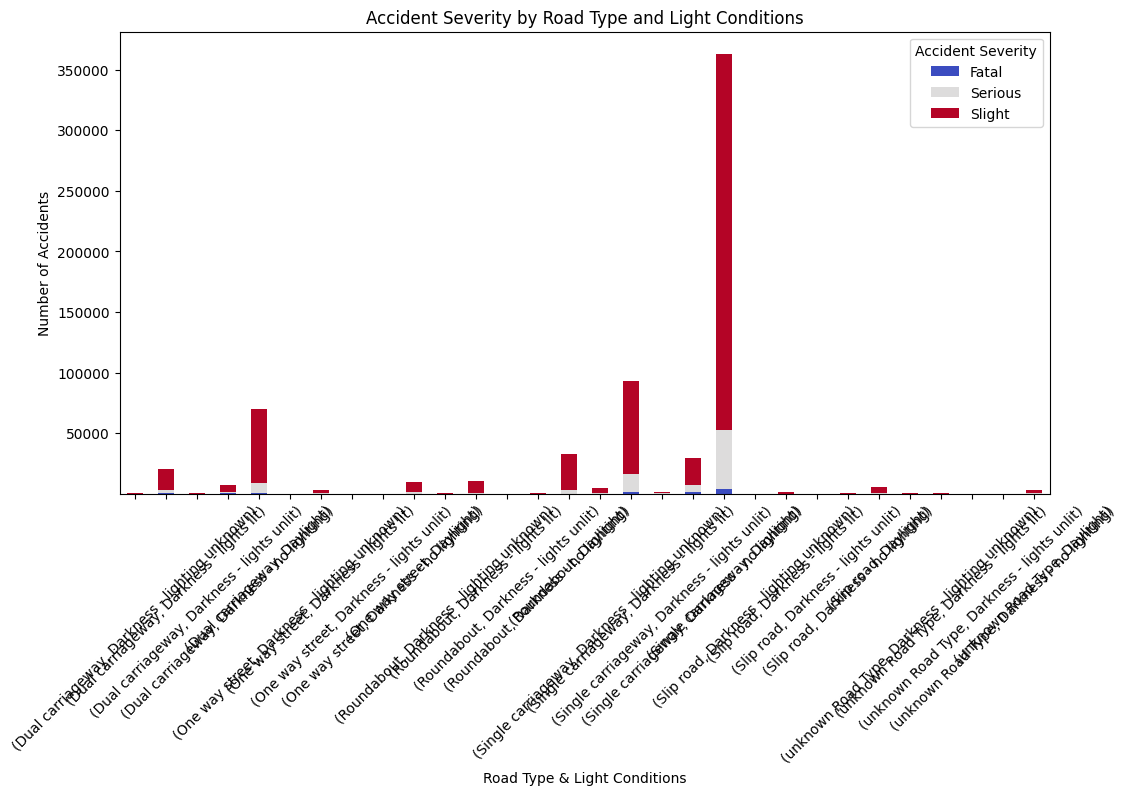

In [102]:
# Convert the grouped data into a DataFrame
light_severity_df = light_severity.unstack().fillna(0)  # Fill NaN with 0

# Plot stacked bar chart
light_severity_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

# Labels and title
plt.xlabel("Road Type & Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Road Type and Light Conditions")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

<h1>Insight 19 : Corelation between vehicle type, urban/rural area, and accident severity</h1>

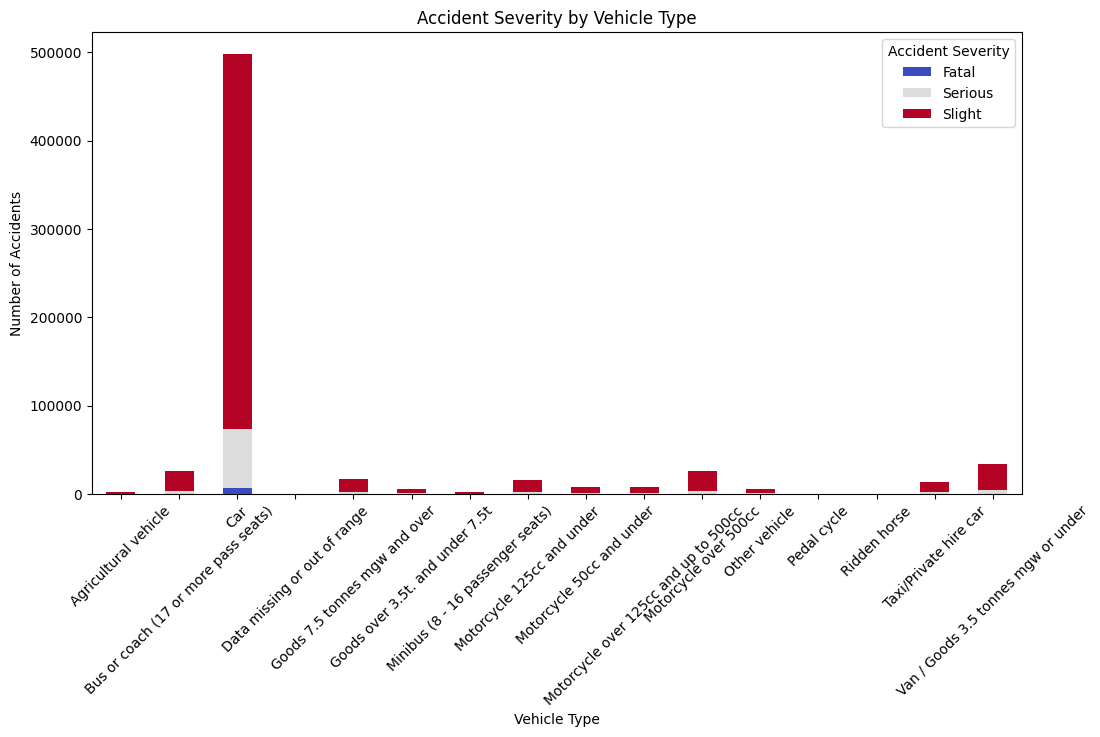

In [107]:
vehicle_severity_df = vehicle_area_severity.unstack().fillna(0)  # Fill NaN with 0

vehicle_severity_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Vehicle Type")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45) 

plt.show()

<h1>Insight 20 : Number of accident that involve Car vehicles</h1>

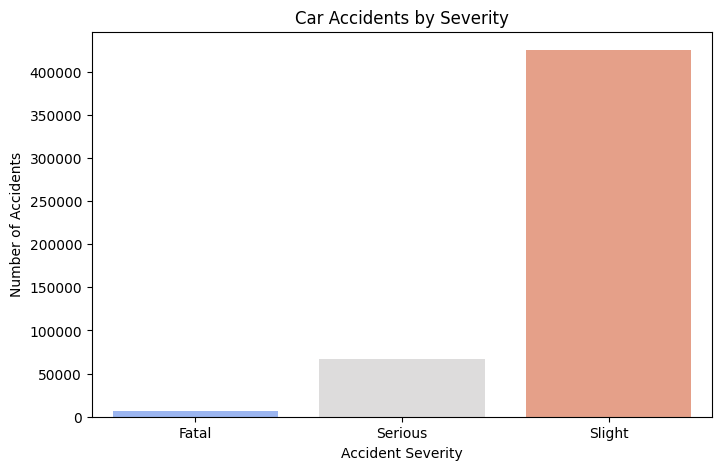

In [108]:
car_accident_severity = horse_aksident.groupby('Accident_Severity').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=car_accident_severity.index, y=car_accident_severity.values, palette="coolwarm")

plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Car Accidents by Severity")

plt.show()

<h4>'Slight' accident severity is most condition in an accident which involve car vehicle</h4>


<h1>Area Analysis</h1>

In [46]:
area_year = aksident.groupby(['District Area', "Year"]).size().reset_index(name = "Accident_Count")

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')

pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<h1>Creating a Line Plot</h1>

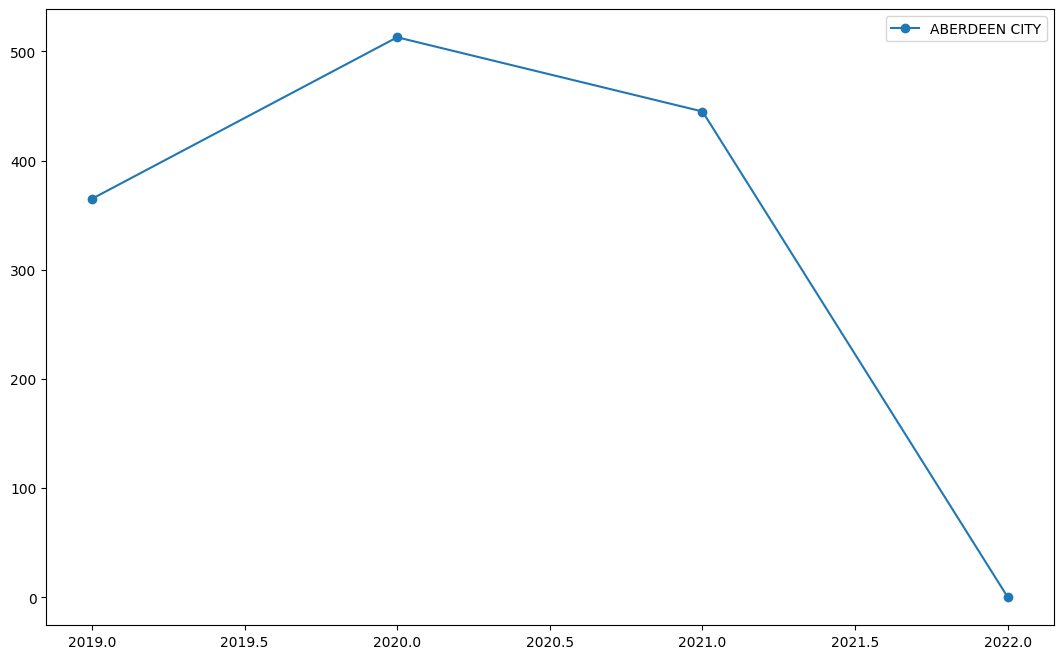

In [47]:
# count = 0
# for x in pivot_table :
#     count += 1
#     plt.plot(pivot_table.index,pivot_table[x], label = x, marker = 'o')
#     if count == 10:
#         break

plt.plot(pivot_table.index, pivot_table['Aberdeen City'], label = 'ABERDEEN CITY', marker = 'o')

plt.gcf().set_size_inches(13, 8)
plt.legend()
plt.show()